In [19]:
!pip install torchinfo tqdm torch

  Using cached torchinfo-1.8.0-py3-none-any.whl.metadata (21 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torchinfo-1.8.0-py3-none-any.whl (23 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.7/899.7 MB 56.7 MB/s  0:00:13m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 71.0 MB/s  0:00:08m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 67.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 62.0 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 25.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 60.1 MB/s  0:00:11m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 68.5 MB

In [1]:
import pandas as pd
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler

# load packages
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

import torch
import torch.nn.functional as F
from torch.utils import data
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
# N, D = X_train.shape
from datetime import date

In [2]:
df = pd.read_csv('data/etf/jan2025/cleaned/gdx_cleaned_jan2025.csv', sep = ',')
df["Date-Time"] = pd.to_datetime(df["Date-Time"])


In [3]:
df["Date-Time"] = df["Date-Time"].dt.tz_convert("America/New_York")

In [4]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,GDX,2025-01-03 09:40:00.022433731-05:00,0.000569,0.02,35.170,35.16,2600.0,35.18,700.0,35.15,...,35.05,100.0,35.27,200.0,0.040,0.005,0.030,2,0,2
1,GDX,2025-01-03 09:40:00.062912518-05:00,0.000284,0.01,35.175,35.17,500.0,35.18,200.0,35.16,...,35.07,100.0,35.27,200.0,0.030,0.010,0.030,2,2,2
2,GDX,2025-01-03 09:40:00.082894593-05:00,0.000569,0.02,35.170,35.16,2600.0,35.18,100.0,35.15,...,35.05,100.0,35.27,200.0,0.040,0.015,0.030,2,2,2
3,GDX,2025-01-03 09:40:00.143438724-05:00,0.000284,0.01,35.175,35.17,400.0,35.18,100.0,35.16,...,35.07,100.0,35.27,200.0,0.030,0.000,0.030,2,0,2
4,GDX,2025-01-03 09:40:00.398413129-05:00,0.000284,0.01,35.185,35.18,610.0,35.19,2400.0,35.17,...,35.09,100.0,35.29,100.0,0.025,0.000,0.015,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,GDX,2025-01-31 15:45:07.157841147-05:00,0.000257,0.01,38.925,38.92,600.0,38.93,800.0,38.91,...,38.83,100.0,39.02,200.0,0.025,0.065,0.105,2,2,2
338957,GDX,2025-01-31 15:45:07.237508298-05:00,0.000514,0.02,38.930,38.92,1100.0,38.94,200.0,38.91,...,38.83,100.0,39.03,100.0,0.015,0.055,0.095,2,2,2
338958,GDX,2025-01-31 15:45:09.202809809-05:00,0.000257,0.01,38.935,38.93,400.0,38.94,200.0,38.92,...,38.84,200.0,39.03,100.0,0.015,0.055,0.095,2,2,2
338959,GDX,2025-01-31 15:45:09.328257655-05:00,0.000514,0.02,38.940,38.93,1500.0,38.95,800.0,38.92,...,38.84,200.0,39.05,100.0,0.005,0.045,0.085,0,2,2


In [5]:
# ---- select columns to normalize: all L1–L10 Bid/Ask Price and Size ----
price_cols = [f"L{i}-BidPrice" for i in range(1, 11)] + [f"L{i}-AskPrice" for i in range(1, 11)]
size_cols  = [f"L{i}-BidSize"  for i in range(1, 11)] + [f"L{i}-AskSize"  for i in range(1, 11)]
cols_to_normalize = price_cols + size_cols

# ---- apply z-score normalization ----
scaler = StandardScaler()
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])



In [6]:
df

,#RIC,Date-Time,rel.spread,abs.spread,mid_price,L1-BidPrice,L1-BidSize,L1-AskPrice,L1-AskSize,L2-BidPrice,...,L10-BidPrice,L10-BidSize,L10-AskPrice,L10-AskSize,Raw_Target_10,Raw_Target_50,Raw_Target_100,Target_10,Target_50,Target_100
0,GDX,2025-01-03 09:40:00.022433731-05:00,0.000569,0.02,35.170,-1.264777,1.746274,-1.261676,-0.180226,-1.264516,...,-1.260276,-0.289312,-1.270929,0.167599,0.040,0.005,0.030,2,0,2
1,GDX,2025-01-03 09:40:00.062912518-05:00,0.000284,0.01,35.175,-1.257408,-0.343107,-1.261676,-0.664708,-1.257147,...,-1.245583,-0.289312,-1.270929,0.167599,0.030,0.010,0.030,2,2,2
2,GDX,2025-01-03 09:40:00.082894593-05:00,0.000569,0.02,35.170,-1.264777,1.746274,-1.261676,-0.761605,-1.264516,...,-1.260276,-0.289312,-1.270929,0.167599,0.040,0.015,0.030,2,2,2
3,GDX,2025-01-03 09:40:00.143438724-05:00,0.000284,0.01,35.175,-1.257408,-0.442601,-1.261676,-0.761605,-1.257147,...,-1.245583,-0.289312,-1.270929,0.167599,0.030,0.000,0.030,2,0,2
4,GDX,2025-01-03 09:40:00.398413129-05:00,0.000284,0.01,35.185,-1.250038,-0.233663,-1.254305,1.467017,-1.249777,...,-1.230891,-0.289312,-1.256227,-0.291127,0.025,0.000,0.015,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,GDX,2025-01-31 15:45:07.157841147-05:00,0.000257,0.01,38.925,1.506150,-0.243613,1.502647,-0.083329,1.506328,...,1.516640,-0.289312,1.485680,0.167599,0.025,0.065,0.105,2,2,2
338957,GDX,2025-01-31 15:45:07.237508298-05:00,0.000514,0.02,38.930,1.506150,0.253859,1.510019,-0.664708,1.506328,...,1.516640,-0.289312,1.493031,-0.291127,0.015,0.055,0.095,2,2,2
338958,GDX,2025-01-31 15:45:09.202809809-05:00,0.000257,0.01,38.935,1.513520,-0.442601,1.510019,-0.664708,1.513697,...,1.523986,0.146142,1.493031,-0.291127,0.015,0.055,0.095,2,2,2
338959,GDX,2025-01-31 15:45:09.328257655-05:00,0.000514,0.02,38.940,1.513520,0.651837,1.517390,-0.083329,1.513697,...,1.523986,0.146142,1.507733,-0.291127,0.005,0.045,0.085,0,2,2


In [7]:
target_cols = [f"Target_{i}"  for i in [10,50,100]]
target_cols

['Target_10', 'Target_50', 'Target_100']

In [8]:
df[price_cols + size_cols+target_cols]

,L1-BidPrice,L2-BidPrice,L3-BidPrice,L4-BidPrice,L5-BidPrice,L6-BidPrice,L7-BidPrice,L8-BidPrice,L9-BidPrice,L10-BidPrice,...,L4-AskSize,L5-AskSize,L6-AskSize,L7-AskSize,L8-AskSize,L9-AskSize,L10-AskSize,Target_10,Target_50,Target_100
0,-1.264777,-1.264516,-1.264174,-1.263766,-1.263165,-1.262265,-1.260876,-1.258503,-1.261411,-1.260276,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,0,2
1,-1.257408,-1.257147,-1.256805,-1.256397,-1.255797,-1.254897,-1.253509,-1.251139,-1.246699,-1.245583,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,2,2
2,-1.264777,-1.264516,-1.264174,-1.263766,-1.263165,-1.262265,-1.260876,-1.258503,-1.261411,-1.260276,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,2,2
3,-1.257408,-1.257147,-1.256805,-1.256397,-1.255797,-1.254897,-1.253509,-1.251139,-1.246699,-1.245583,...,-0.663343,0.544528,2.108410,-0.409268,2.347116,-0.346646,0.167599,2,0,2
4,-1.250038,-1.249777,-1.249436,-1.249028,-1.248428,-1.247529,-1.246142,-1.243776,-1.239343,-1.230891,...,0.700116,1.735179,-0.625941,1.598717,-0.422550,-0.078338,-0.291127,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338956,1.506150,1.506328,1.506520,1.506909,1.507444,1.508174,1.509103,1.510206,1.511725,1.516640,...,-0.322478,1.193974,-0.388171,0.333686,-0.422550,-0.346646,0.167599,2,2,2
338957,1.506150,1.506328,1.506520,1.506909,1.507444,1.508174,1.509103,1.510206,1.511725,1.516640,...,1.381845,-0.537882,-0.010117,-0.552696,-0.422550,-0.078338,-0.291127,2,2,2
338958,1.513520,1.513697,1.513889,1.514278,1.514812,1.515543,1.516470,1.517569,1.519081,1.523986,...,1.381845,-0.537882,-0.010117,-0.552696,-0.422550,-0.078338,-0.291127,2,2,2
338959,1.513520,1.513697,1.513889,1.514278,1.514812,1.515543,1.516470,1.517569,1.519081,1.523986,...,-0.436100,-0.193675,-0.744825,-0.552696,-0.237906,-0.346646,-0.291127,0,2,2


In [9]:
def prepare_x(data):
    df1 = data[:, :40]
    return np.array(df1)

def get_label(data):
    lob = data[:, -3:]
    return lob

def data_classification(X, Y, T):
    [N, D] = X.shape
    df = np.array(X)

    dY = np.array(Y)

    dataY = dY[T - 1:N]

    dataX = np.zeros((N - T + 1, T, D))
    for i in range(T, N + 1):
        dataX[i - T] = df[i - T:i, :]

    return dataX, dataY

def torch_data(x, y):
    x = torch.from_numpy(x)
    x = torch.unsqueeze(x, 1)
    y = torch.from_numpy(y)
    y = F.one_hot(y, num_classes=3)
    return x, y

In [10]:
class Dataset(data.Dataset):
    """Characterizes a dataset for PyTorch"""
    def __init__(self, data, k, num_classes, T):
        """Initialization"""
        self.k = k
        self.num_classes = num_classes
        self.T = T

        x = prepare_x(data)
        y = get_label(data)
        x, y = data_classification(x, y, self.T)
        y = y[:,self.k]
        self.length = len(x)

        x = torch.from_numpy(x)
        self.x = torch.unsqueeze(x, 1)
        self.y = torch.from_numpy(y)

    def __len__(self):
        """Denotes the total number of samples"""
        return self.length

    def __getitem__(self, index):
        """Generates samples of data"""
        return self.x[index], self.y[index]

In [11]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [12]:
df["Date"] = pd.to_datetime(df["Date-Time"]).dt.date
df.groupby(["Date"]).size()

Date
2025-01-03    11408
2025-01-06    18970
2025-01-07    19495
2025-01-08    19059
2025-01-10    25027
2025-01-13    21295
2025-01-14    16302
2025-01-15    17897
2025-01-16    17470
2025-01-17    16188
2025-01-21    15772
2025-01-22    13444
2025-01-23    14130
2025-01-24    11897
2025-01-27    19327
2025-01-28    11643
2025-01-29    24406
2025-01-30    20731
2025-01-31    24500
dtype: int64

In [13]:

df_train = df[(df["Date"] >= date(2025, 1, 3)) & (df["Date"] <= date(2025, 1, 17))]
df_val = df[(df["Date"] >= date(2025, 1, 21)) & (df["Date"] <= date(2025, 1, 27))]
df_test = df[(df["Date"] >= date(2025, 1, 28)) & (df["Date"] <= date(2025, 1, 31))]

In [14]:
df_train = df_train[price_cols + size_cols+target_cols]
df_test =  df_test[price_cols + size_cols+target_cols]
df_val = df_val[price_cols + size_cols+target_cols]

In [15]:
batch_size = 64

dataset_train = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_val = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)
dataset_test = Dataset(data=df_train.to_numpy(), k=2, num_classes=3, T=100)

train_loader = torch.utils.data.DataLoader(dataset=dataset_train, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=dataset_val, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=dataset_test, batch_size=batch_size, shuffle=False)

print(dataset_train.x.shape, dataset_train.y.shape)

torch.Size([183012, 1, 100, 40]) torch.Size([183012])


In [16]:
class deeplob(nn.Module):
    def __init__(self, y_len):
        super().__init__()
        self.y_len = y_len

        # convolution blocks
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.LeakyReLU(negative_slope=0.01),
#             nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,2), stride=(1,2)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.Tanh(),
            nn.BatchNorm2d(32),
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1,10)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(4,1)),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(32),
        )

        # inception moduels
        self.inp1 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(5,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )
        self.inp3 = nn.Sequential(
            nn.MaxPool2d((3, 1), stride=(1, 1), padding=(1, 0)),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1,1), padding='same'),
            nn.LeakyReLU(negative_slope=0.01),
            nn.BatchNorm2d(64),
        )

        # lstm layers
        self.lstm = nn.LSTM(input_size=192, hidden_size=64, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(64, self.y_len)

    def forward(self, x):
        # h0: (number of hidden layers, batch size, hidden size)
        h0 = torch.zeros(1, x.size(0), 64).to(device)
        c0 = torch.zeros(1, x.size(0), 64).to(device)

        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)

        x_inp1 = self.inp1(x)
        x_inp2 = self.inp2(x)
        x_inp3 = self.inp3(x)

        x = torch.cat((x_inp1, x_inp2, x_inp3), dim=1)

#         x = torch.transpose(x, 1, 2)
        x = x.permute(0, 2, 1, 3)
        x = torch.reshape(x, (-1, x.shape[1], x.shape[2]))

        x, _ = self.lstm(x, (h0, c0))
        x = x[:, -1, :]
        x = self.fc1(x)
        forecast_y = torch.softmax(x, dim=1)

        return forecast_y

In [17]:
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)

deeplob(
  (conv1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): LeakyReLU(negative_slope=0.01)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): LeakyReLU(negative_slope=0.01)
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (7): LeakyReLU(negative_slope=0.01)
    (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 2), stride=(1, 2))
    (1): Tanh()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(4, 1), stride=(1, 1))
    (4): Tanh()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Conv2d(32, 32, kernel_size=(4, 1), stride

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [19]:
# A function to encapsulate the training loop
def batch_gd(model, criterion, optimizer, train_loader, test_loader, epochs):

    train_losses = np.zeros(epochs)
    test_losses = np.zeros(epochs)
    best_test_loss = np.inf
    best_test_epoch = 0

    for it in tqdm(range(epochs)):

        model.train()
        t0 = datetime.now()
        train_loss = []
        for inputs, targets in train_loader:
            # move data to GPU
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            # print("inputs.shape:", inputs.shape)
            # zero the parameter gradients
            optimizer.zero_grad()
            # Forward pass
            # print("about to get model output")
            outputs = model(inputs)
            # print("done getting model output")
            # print("outputs.shape:", outputs.shape, "targets.shape:", targets.shape)
            loss = criterion(outputs, targets)
            # Backward and optimize
            # print("about to optimize")
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
        # Get train loss and test loss
        train_loss = np.mean(train_loss) # a little misleading

        model.eval()
        test_loss = []
        for inputs, targets in test_loader:
            inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_loss.append(loss.item())
        test_loss = np.mean(test_loss)

        # Save losses
        train_losses[it] = train_loss
        test_losses[it] = test_loss

        if test_loss < best_test_loss:
            torch.save(model.state_dict(), './best_val_model_pytorch.pt')
            best_test_loss = test_loss
            best_test_epoch = it
            print('model saved')

        dt = datetime.now() - t0
        print(f'Epoch {it+1}/{epochs}, Train Loss: {train_loss:.4f}, \
          Validation Loss: {test_loss:.4f}, Duration: {dt}, Best Val Epoch: {best_test_epoch}')

    return train_losses, test_losses

In [20]:
train_losses, val_losses = batch_gd(model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:29<24:18, 29.76s/it]

model saved
Epoch 1/50, Train Loss: 1.0569,           Validation Loss: 1.0023, Duration: 0:00:29.761160, Best Val Epoch: 0


  4%|▍         | 2/50 [01:20<33:46, 42.21s/it]

model saved
Epoch 2/50, Train Loss: 0.9694,           Validation Loss: 0.9043, Duration: 0:00:50.922338, Best Val Epoch: 1


  6%|▌         | 3/50 [01:51<28:52, 36.86s/it]

model saved
Epoch 3/50, Train Loss: 0.9012,           Validation Loss: 0.8580, Duration: 0:00:30.502588, Best Val Epoch: 2


  8%|▊         | 4/50 [02:22<26:35, 34.68s/it]

model saved
Epoch 4/50, Train Loss: 0.8617,           Validation Loss: 0.8310, Duration: 0:00:31.322436, Best Val Epoch: 3


 10%|█         | 5/50 [02:49<23:59, 32.00s/it]

model saved
Epoch 5/50, Train Loss: 0.8348,           Validation Loss: 0.7964, Duration: 0:00:27.247902, Best Val Epoch: 4


 12%|█▏        | 6/50 [03:18<22:38, 30.87s/it]

model saved
Epoch 6/50, Train Loss: 0.8110,           Validation Loss: 0.7814, Duration: 0:00:28.670268, Best Val Epoch: 5


 14%|█▍        | 7/50 [03:44<21:04, 29.41s/it]

Epoch 7/50, Train Loss: 0.8005,           Validation Loss: 0.7815, Duration: 0:00:26.402045, Best Val Epoch: 5


 16%|█▌        | 8/50 [04:17<21:13, 30.31s/it]

model saved
Epoch 8/50, Train Loss: 0.7877,           Validation Loss: 0.7602, Duration: 0:00:32.242999, Best Val Epoch: 7


 18%|█▊        | 9/50 [04:43<19:54, 29.14s/it]

model saved
Epoch 9/50, Train Loss: 0.7794,           Validation Loss: 0.7590, Duration: 0:00:26.554044, Best Val Epoch: 8


 20%|██        | 10/50 [05:12<19:25, 29.15s/it]

Epoch 10/50, Train Loss: 0.7754,           Validation Loss: 0.7661, Duration: 0:00:29.167268, Best Val Epoch: 8


 22%|██▏       | 11/50 [05:44<19:31, 30.05s/it]

model saved
Epoch 11/50, Train Loss: 0.7678,           Validation Loss: 0.7527, Duration: 0:00:32.096981, Best Val Epoch: 10


 24%|██▍       | 12/50 [06:13<18:50, 29.76s/it]

model saved
Epoch 12/50, Train Loss: 0.7578,           Validation Loss: 0.7460, Duration: 0:00:29.086770, Best Val Epoch: 11


 26%|██▌       | 13/50 [06:44<18:32, 30.05s/it]

model saved
Epoch 13/50, Train Loss: 0.7562,           Validation Loss: 0.7351, Duration: 0:00:30.738203, Best Val Epoch: 12


 28%|██▊       | 14/50 [07:15<18:08, 30.24s/it]

model saved
Epoch 14/50, Train Loss: 0.7509,           Validation Loss: 0.7320, Duration: 0:00:30.669372, Best Val Epoch: 13


 30%|███       | 15/50 [07:40<16:48, 28.81s/it]

model saved
Epoch 15/50, Train Loss: 0.7457,           Validation Loss: 0.7293, Duration: 0:00:25.489718, Best Val Epoch: 14


 32%|███▏      | 16/50 [08:07<15:55, 28.09s/it]

Epoch 16/50, Train Loss: 0.7404,           Validation Loss: 0.7328, Duration: 0:00:26.425478, Best Val Epoch: 14


 34%|███▍      | 17/50 [08:39<16:04, 29.23s/it]

model saved
Epoch 17/50, Train Loss: 0.7453,           Validation Loss: 0.7210, Duration: 0:00:31.890274, Best Val Epoch: 16


 36%|███▌      | 18/50 [09:09<15:48, 29.65s/it]

model saved
Epoch 18/50, Train Loss: 0.7385,           Validation Loss: 0.7203, Duration: 0:00:30.632999, Best Val Epoch: 17


 38%|███▊      | 19/50 [09:40<15:29, 29.98s/it]

model saved
Epoch 19/50, Train Loss: 0.7329,           Validation Loss: 0.7203, Duration: 0:00:30.739630, Best Val Epoch: 18


 40%|████      | 20/50 [10:11<15:03, 30.13s/it]

model saved
Epoch 20/50, Train Loss: 0.7350,           Validation Loss: 0.7164, Duration: 0:00:30.488299, Best Val Epoch: 19


 42%|████▏     | 21/50 [10:41<14:40, 30.37s/it]

model saved
Epoch 21/50, Train Loss: 0.7267,           Validation Loss: 0.7136, Duration: 0:00:30.919588, Best Val Epoch: 20


 44%|████▍     | 22/50 [11:13<14:15, 30.57s/it]

Epoch 22/50, Train Loss: 0.7263,           Validation Loss: 0.7172, Duration: 0:00:31.023782, Best Val Epoch: 20


 46%|████▌     | 23/50 [11:39<13:13, 29.37s/it]

model saved
Epoch 23/50, Train Loss: 0.7323,           Validation Loss: 0.7081, Duration: 0:00:26.590115, Best Val Epoch: 22


 48%|████▊     | 24/50 [12:10<12:58, 29.95s/it]

model saved
Epoch 24/50, Train Loss: 0.7194,           Validation Loss: 0.7071, Duration: 0:00:31.286611, Best Val Epoch: 23


 50%|█████     | 25/50 [12:36<11:56, 28.65s/it]

Epoch 25/50, Train Loss: 0.7196,           Validation Loss: 0.7088, Duration: 0:00:25.624049, Best Val Epoch: 23


 52%|█████▏    | 26/50 [13:02<11:06, 27.77s/it]

model saved
Epoch 26/50, Train Loss: 0.7175,           Validation Loss: 0.7048, Duration: 0:00:25.707530, Best Val Epoch: 25


 54%|█████▍    | 27/50 [13:27<10:19, 26.95s/it]

Epoch 27/50, Train Loss: 0.7191,           Validation Loss: 0.7114, Duration: 0:00:25.030543, Best Val Epoch: 25


 56%|█████▌    | 28/50 [13:57<10:13, 27.89s/it]

Epoch 28/50, Train Loss: 0.7145,           Validation Loss: 0.7060, Duration: 0:00:30.094338, Best Val Epoch: 25


 58%|█████▊    | 29/50 [14:26<09:53, 28.26s/it]

Epoch 29/50, Train Loss: 0.7128,           Validation Loss: 0.7121, Duration: 0:00:29.112431, Best Val Epoch: 25


 60%|██████    | 30/50 [14:59<09:51, 29.57s/it]

model saved
Epoch 30/50, Train Loss: 0.7118,           Validation Loss: 0.6954, Duration: 0:00:32.634918, Best Val Epoch: 29


 62%|██████▏   | 31/50 [15:31<09:36, 30.33s/it]

Epoch 31/50, Train Loss: 0.7200,           Validation Loss: 0.7018, Duration: 0:00:32.084910, Best Val Epoch: 29


 64%|██████▍   | 32/50 [15:55<08:33, 28.55s/it]

Epoch 32/50, Train Loss: 0.7107,           Validation Loss: 0.6983, Duration: 0:00:24.407026, Best Val Epoch: 29


 66%|██████▌   | 33/50 [16:27<08:22, 29.58s/it]

Epoch 33/50, Train Loss: 0.7065,           Validation Loss: 0.7087, Duration: 0:00:31.973780, Best Val Epoch: 29


 68%|██████▊   | 34/50 [16:59<08:05, 30.33s/it]

Epoch 34/50, Train Loss: 0.7051,           Validation Loss: 0.6957, Duration: 0:00:32.099561, Best Val Epoch: 29


 70%|███████   | 35/50 [17:29<07:32, 30.16s/it]

model saved
Epoch 35/50, Train Loss: 0.7047,           Validation Loss: 0.6927, Duration: 0:00:29.737272, Best Val Epoch: 34


 72%|███████▏  | 36/50 [17:58<06:56, 29.77s/it]

Epoch 36/50, Train Loss: 0.7010,           Validation Loss: 0.7002, Duration: 0:00:28.855721, Best Val Epoch: 34


 74%|███████▍  | 37/50 [18:29<06:32, 30.19s/it]

model saved
Epoch 37/50, Train Loss: 0.7020,           Validation Loss: 0.6891, Duration: 0:00:31.181680, Best Val Epoch: 36


 76%|███████▌  | 38/50 [18:55<05:48, 29.00s/it]

model saved
Epoch 38/50, Train Loss: 0.7045,           Validation Loss: 0.6874, Duration: 0:00:26.230790, Best Val Epoch: 37


 78%|███████▊  | 39/50 [19:19<05:02, 27.50s/it]

Epoch 39/50, Train Loss: 0.6984,           Validation Loss: 0.6926, Duration: 0:00:23.982420, Best Val Epoch: 37


 80%|████████  | 40/50 [19:50<04:44, 28.41s/it]

Epoch 40/50, Train Loss: 0.7015,           Validation Loss: 0.7188, Duration: 0:00:30.525040, Best Val Epoch: 37


 82%|████████▏ | 41/50 [20:20<04:20, 28.92s/it]

Epoch 41/50, Train Loss: 0.6979,           Validation Loss: 0.6890, Duration: 0:00:30.112430, Best Val Epoch: 37


 84%|████████▍ | 42/50 [20:50<03:54, 29.28s/it]

Epoch 42/50, Train Loss: 0.6971,           Validation Loss: 0.6914, Duration: 0:00:30.125306, Best Val Epoch: 37


 86%|████████▌ | 43/50 [21:21<03:27, 29.68s/it]

Epoch 43/50, Train Loss: 0.6971,           Validation Loss: 0.6921, Duration: 0:00:30.602131, Best Val Epoch: 37


 88%|████████▊ | 44/50 [21:45<02:48, 28.08s/it]

model saved
Epoch 44/50, Train Loss: 0.6938,           Validation Loss: 0.6861, Duration: 0:00:24.349203, Best Val Epoch: 43


 90%|█████████ | 45/50 [22:17<02:26, 29.23s/it]

Epoch 45/50, Train Loss: 0.6929,           Validation Loss: 0.6920, Duration: 0:00:31.914018, Best Val Epoch: 43


 92%|█████████▏| 46/50 [22:48<01:59, 29.76s/it]

Epoch 46/50, Train Loss: 0.7162,           Validation Loss: 0.6923, Duration: 0:00:30.995779, Best Val Epoch: 43


 94%|█████████▍| 47/50 [23:18<01:30, 30.00s/it]

Epoch 47/50, Train Loss: 0.6921,           Validation Loss: 0.7050, Duration: 0:00:30.561434, Best Val Epoch: 43


 96%|█████████▌| 48/50 [23:48<00:59, 29.78s/it]

model saved
Epoch 48/50, Train Loss: 0.6905,           Validation Loss: 0.6807, Duration: 0:00:29.266687, Best Val Epoch: 47


 98%|█████████▊| 49/50 [24:18<00:29, 29.93s/it]

Epoch 49/50, Train Loss: 0.6925,           Validation Loss: 0.6994, Duration: 0:00:30.261603, Best Val Epoch: 47


100%|██████████| 50/50 [24:44<00:00, 29.68s/it]

Epoch 50/50, Train Loss: 0.6987,           Validation Loss: 0.6856, Duration: 0:00:25.755101, Best Val Epoch: 47


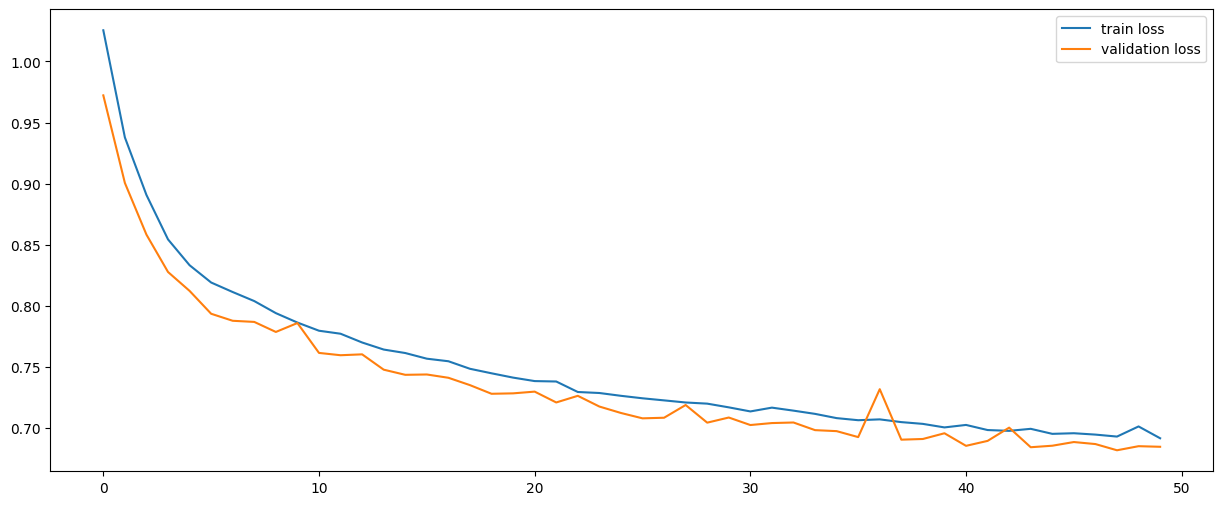

In [32]:
plt.figure(figsize=(15,6))
plt.plot(train_losses, label='train loss')
plt.plot(val_losses, label='validation loss')
plt.legend()

In [21]:
state = torch.load('./best_val_model_pytorch.pt')
model = deeplob(y_len = dataset_train.num_classes)
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.8695


In [22]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [24]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.8687353834721221
              precision    recall  f1-score   support

           0     0.7254    0.6246    0.6712     36584
           1     0.8990    0.9294    0.9140     72823
           2     0.8980    0.9301    0.9138     73605

    accuracy                         0.8687    183012
   macro avg     0.8408    0.8280    0.8330    183012
weighted avg     0.8639    0.8687    0.8654    183012



In [25]:
class_summary = df.groupby("Target_100").size().reset_index(name="Count")

# Calculate relative percentage
class_summary["Percent"] = (class_summary["Count"] / class_summary["Count"].sum()) * 100
class_summary["Percent"] = class_summary["Percent"].round(2)


print(class_summary)

   Target_100   Count  Percent
0           0   66011    19.47
1           1  135468    39.97
2           2  137482    40.56


In [26]:
from models.mlp import MLP

mlp_model = MLP()
mlp_model.to(device)

MLP(
  (linear1): Linear(in_features=4000, out_features=128, bias=True)
  (leakyReLU): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.1, inplace=False)
  (linear2): Linear(in_features=128, out_features=3, bias=True)
)

In [27]:
mlp_train_losses, mlp_val_losses = batch_gd(mlp_model, criterion, optimizer,
                                    train_loader, val_loader, epochs=50)

  2%|▏         | 1/50 [00:07<06:06,  7.48s/it]

model saved
Epoch 1/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.476574, Best Val Epoch: 0


  4%|▍         | 2/50 [00:14<05:57,  7.45s/it]

Epoch 2/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.423744, Best Val Epoch: 0


  6%|▌         | 3/50 [00:22<05:51,  7.48s/it]

Epoch 3/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.512946, Best Val Epoch: 0


  8%|▊         | 4/50 [00:29<05:42,  7.44s/it]

Epoch 4/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.385389, Best Val Epoch: 0


 10%|█         | 5/50 [00:37<05:32,  7.38s/it]

Epoch 5/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.270213, Best Val Epoch: 0


 12%|█▏        | 6/50 [00:44<05:22,  7.33s/it]

Epoch 6/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.233098, Best Val Epoch: 0


 14%|█▍        | 7/50 [00:51<05:14,  7.31s/it]

Epoch 7/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.279663, Best Val Epoch: 0


 16%|█▌        | 8/50 [00:59<05:08,  7.35s/it]

Epoch 8/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.437854, Best Val Epoch: 0


 18%|█▊        | 9/50 [01:05<04:54,  7.19s/it]

Epoch 9/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:06.840688, Best Val Epoch: 0


 20%|██        | 10/50 [01:13<04:47,  7.20s/it]

Epoch 10/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.212181, Best Val Epoch: 0


 22%|██▏       | 11/50 [01:20<04:40,  7.19s/it]

Epoch 11/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.166541, Best Val Epoch: 0


 24%|██▍       | 12/50 [01:27<04:33,  7.20s/it]

Epoch 12/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.231304, Best Val Epoch: 0


 26%|██▌       | 13/50 [01:34<04:25,  7.18s/it]

Epoch 13/50, Train Loss: 1.0924,           Validation Loss: 1.0922, Duration: 0:00:07.124297, Best Val Epoch: 0


 28%|██▊       | 14/50 [01:41<04:18,  7.17s/it]

Epoch 14/50, Train Loss: 1.0924,           Validation Loss: 1.0922, Duration: 0:00:07.149272, Best Val Epoch: 0


 30%|███       | 15/50 [01:49<04:11,  7.20s/it]

Epoch 15/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.256309, Best Val Epoch: 0


 32%|███▏      | 16/50 [01:56<04:03,  7.16s/it]

Epoch 16/50, Train Loss: 1.0924,           Validation Loss: 1.0922, Duration: 0:00:07.071701, Best Val Epoch: 0


 34%|███▍      | 17/50 [02:03<03:57,  7.18s/it]

Epoch 17/50, Train Loss: 1.0924,           Validation Loss: 1.0922, Duration: 0:00:07.238562, Best Val Epoch: 0


 36%|███▌      | 18/50 [02:10<03:50,  7.20s/it]

Epoch 18/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.236020, Best Val Epoch: 0


 38%|███▊      | 19/50 [02:17<03:44,  7.25s/it]

Epoch 19/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.369202, Best Val Epoch: 0


 40%|████      | 20/50 [02:25<03:37,  7.24s/it]

Epoch 20/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.222319, Best Val Epoch: 0


 42%|████▏     | 21/50 [02:32<03:30,  7.26s/it]

Epoch 21/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.303821, Best Val Epoch: 0


 44%|████▍     | 22/50 [02:39<03:22,  7.24s/it]

Epoch 22/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.179647, Best Val Epoch: 0


 46%|████▌     | 23/50 [02:46<03:14,  7.20s/it]

Epoch 23/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.124039, Best Val Epoch: 0


 48%|████▊     | 24/50 [02:53<03:06,  7.17s/it]

Epoch 24/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.108533, Best Val Epoch: 0


 50%|█████     | 25/50 [03:01<03:01,  7.25s/it]

Epoch 25/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.426365, Best Val Epoch: 0


 52%|█████▏    | 26/50 [03:08<02:54,  7.25s/it]

Epoch 26/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.249710, Best Val Epoch: 0


 54%|█████▍    | 27/50 [03:15<02:46,  7.24s/it]

Epoch 27/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.220968, Best Val Epoch: 0


 56%|█████▌    | 28/50 [03:22<02:39,  7.23s/it]

Epoch 28/50, Train Loss: 1.0927,           Validation Loss: 1.0922, Duration: 0:00:07.211379, Best Val Epoch: 0


 58%|█████▊    | 29/50 [03:29<02:30,  7.16s/it]

Epoch 29/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:06.993602, Best Val Epoch: 0


 60%|██████    | 30/50 [03:36<02:21,  7.10s/it]

Epoch 30/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:06.946562, Best Val Epoch: 0


 62%|██████▏   | 31/50 [03:44<02:15,  7.11s/it]

Epoch 31/50, Train Loss: 1.0924,           Validation Loss: 1.0922, Duration: 0:00:07.128092, Best Val Epoch: 0


 64%|██████▍   | 32/50 [03:51<02:08,  7.13s/it]

Epoch 32/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.198669, Best Val Epoch: 0


 66%|██████▌   | 33/50 [03:58<02:01,  7.16s/it]

Epoch 33/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.216543, Best Val Epoch: 0


 68%|██████▊   | 34/50 [04:05<01:54,  7.13s/it]

Epoch 34/50, Train Loss: 1.0924,           Validation Loss: 1.0922, Duration: 0:00:07.052438, Best Val Epoch: 0


 70%|███████   | 35/50 [04:12<01:47,  7.14s/it]

Epoch 35/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.181136, Best Val Epoch: 0


 72%|███████▏  | 36/50 [04:19<01:40,  7.16s/it]

Epoch 36/50, Train Loss: 1.0924,           Validation Loss: 1.0922, Duration: 0:00:07.193691, Best Val Epoch: 0


 74%|███████▍  | 37/50 [04:27<01:33,  7.18s/it]

Epoch 37/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.236341, Best Val Epoch: 0


 76%|███████▌  | 38/50 [04:35<01:28,  7.39s/it]

Epoch 38/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.869670, Best Val Epoch: 0


 78%|███████▊  | 39/50 [04:42<01:20,  7.35s/it]

Epoch 39/50, Train Loss: 1.0924,           Validation Loss: 1.0922, Duration: 0:00:07.257322, Best Val Epoch: 0


 80%|████████  | 40/50 [04:49<01:12,  7.29s/it]

Epoch 40/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.159439, Best Val Epoch: 0


 82%|████████▏ | 41/50 [04:55<01:03,  7.07s/it]

Epoch 41/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:06.555216, Best Val Epoch: 0


 84%|████████▍ | 42/50 [05:02<00:56,  7.03s/it]

Epoch 42/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:06.933107, Best Val Epoch: 0


 86%|████████▌ | 43/50 [05:10<00:49,  7.11s/it]

Epoch 43/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.287686, Best Val Epoch: 0


 88%|████████▊ | 44/50 [05:16<00:40,  6.73s/it]

Epoch 44/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:05.837579, Best Val Epoch: 0


 90%|█████████ | 45/50 [05:23<00:34,  6.85s/it]

Epoch 45/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.136025, Best Val Epoch: 0


 92%|█████████▏| 46/50 [05:30<00:27,  6.97s/it]

Epoch 46/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.250850, Best Val Epoch: 0


 94%|█████████▍| 47/50 [05:37<00:21,  7.03s/it]

Epoch 47/50, Train Loss: 1.0925,           Validation Loss: 1.0922, Duration: 0:00:07.181454, Best Val Epoch: 0


 96%|█████████▌| 48/50 [05:44<00:14,  7.14s/it]

Epoch 48/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.376774, Best Val Epoch: 0


 98%|█████████▊| 49/50 [05:52<00:07,  7.19s/it]

Epoch 49/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.303820, Best Val Epoch: 0


100%|██████████| 50/50 [05:59<00:00,  7.19s/it]

Epoch 50/50, Train Loss: 1.0926,           Validation Loss: 1.0922, Duration: 0:00:07.167408, Best Val Epoch: 0


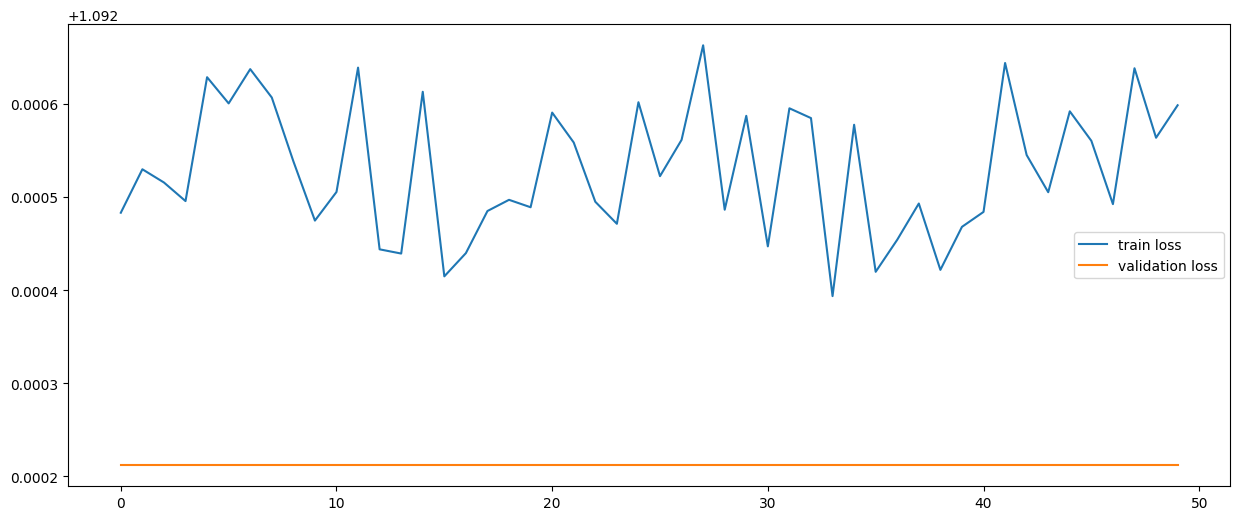

In [35]:
plt.figure(figsize=(15,6))
plt.plot(mlp_train_losses, label='train loss')
plt.plot(mlp_val_losses, label='validation loss')
plt.legend()

In [36]:
state = torch.load('./best_val_model_pytorch.pt')
model = MLP()
model.to(device)
model.load_state_dict(state)
model.eval()

#state = torch.load("checkpoint.pt", map_location="cuda:0")

n_correct = 0.
n_total = 0.
for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    # update counts
    n_correct += (predictions == targets).sum().item()
    n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f"Test acc: {test_acc:.4f}")

Test acc: 0.3879


In [37]:
# model = torch.load('best_val_model_pytorch')
all_targets = []
all_predictions = []

for inputs, targets in test_loader:
    # Move to GPU
    inputs, targets = inputs.to(device, dtype=torch.float), targets.to(device, dtype=torch.int64)

    # Forward pass
    outputs = model(inputs)

    # Get prediction
    # torch.max returns both max and argmax
    _, predictions = torch.max(outputs, 1)

    all_targets.append(targets.cpu().numpy())
    all_predictions.append(predictions.cpu().numpy())

all_targets = np.concatenate(all_targets)
all_predictions = np.concatenate(all_predictions)

In [38]:
print('accuracy_score:', accuracy_score(all_targets, all_predictions))
print(classification_report(all_targets, all_predictions, digits=4))

accuracy_score: 0.38788713308416933
              precision    recall  f1-score   support

           0     0.2014    0.1155    0.1468     36584
           1     0.4125    0.4290    0.4206     72823
           2     0.4116    0.4826    0.4443     73605

    accuracy                         0.3879    183012
   macro avg     0.3419    0.3424    0.3372    183012
weighted avg     0.3700    0.3879    0.3754    183012

